In [1]:
# Parameters
base_result_filename = "phenopath_results/analyzed_phenopath_results.npz"
results_dir = "../.."
kde_bounds = [0, 1]
right_y_title = ""
transformation_name = "identity"
start_indices = [0]
metric_name = "neg_fdr"
y_title = "Negative FDR"


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from plot_utils import phenopathVariantsPlotter as Plotter

In [4]:
transformations = {'identity': (lambda x: x), 'log': (lambda x: np.log(x)/np.log(10))}
transformation = transformations[transformation_name]

In [5]:
plotter = Plotter(base_result_filename, results_dir, kde_bounds)

In [6]:
performance = plotter.load_performance_results(metric_name)
performance = transformation(performance)

# Method variants side by side

### Results for Uncensored

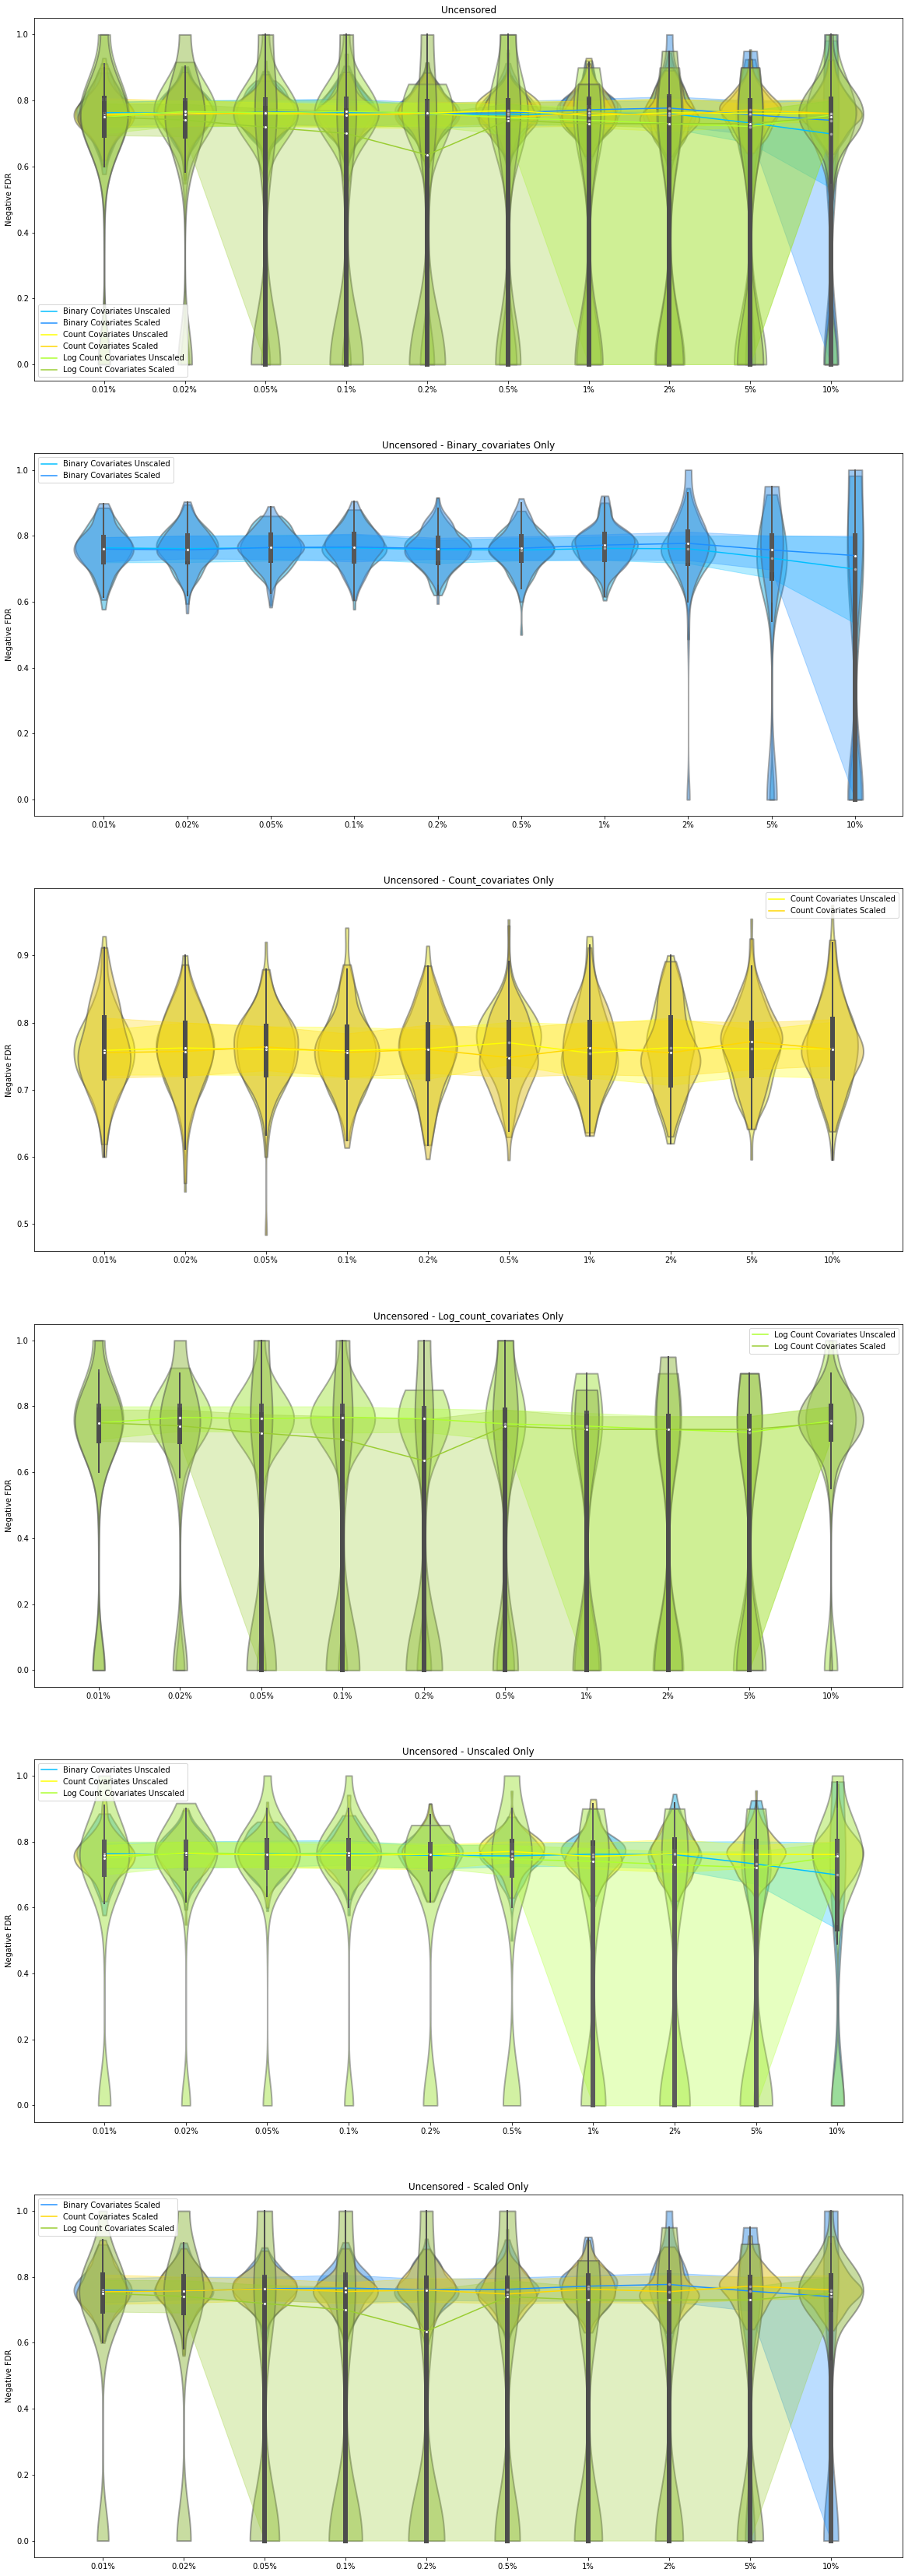

In [7]:
for start_index in start_indices:
    axes = plotter.covar_and_scale_choices_side_by_side(performance, censor_choice="uncensored", 
                                                    y_title=y_title, start_index=start_index)
    if transformation_name == 'log':
        for ax in axes: 
            plotter.annotate_important_log_scores(ax, right_y_title)

### Results for Censored

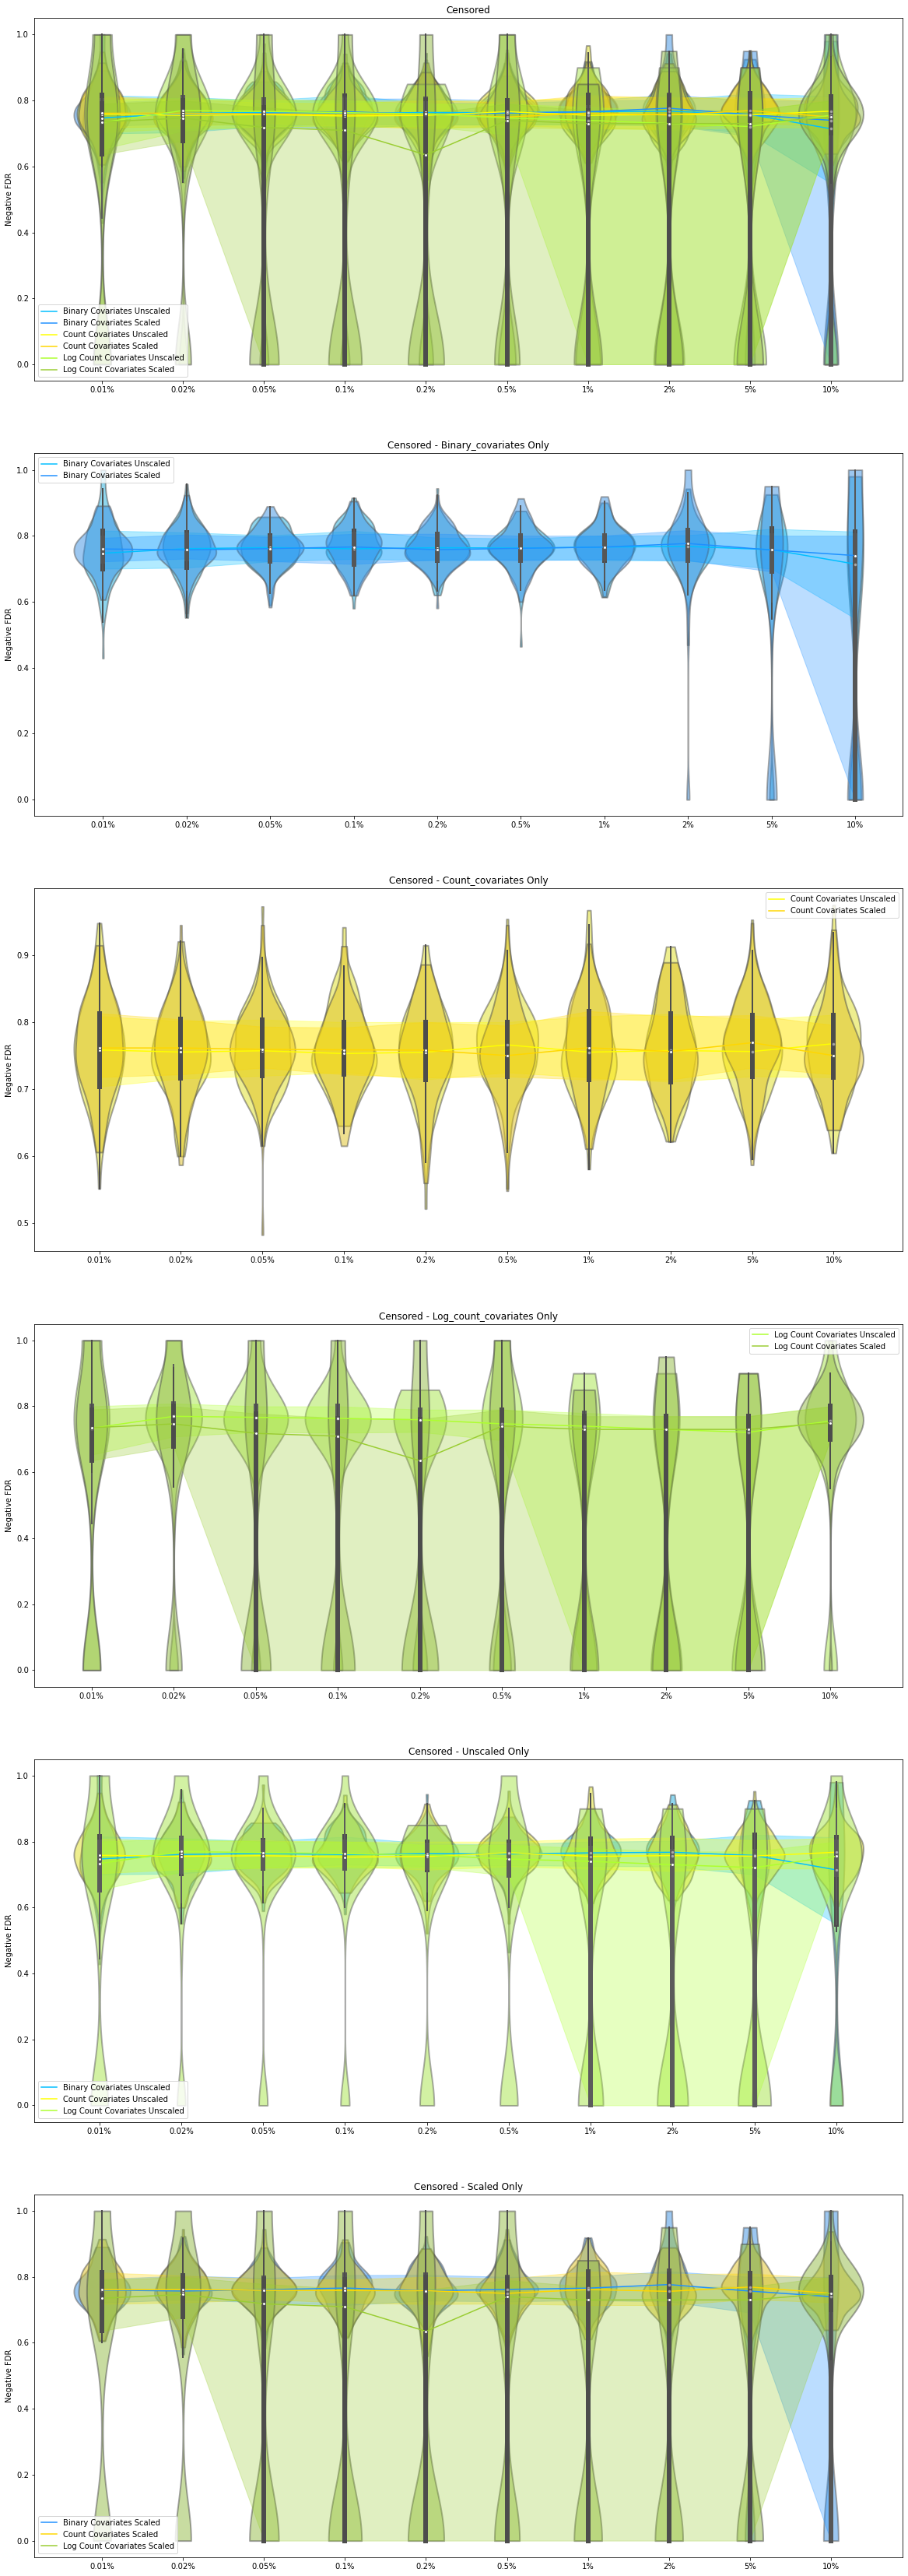

In [8]:
for start_index in start_indices:
    axes = plotter.covar_and_scale_choices_side_by_side(performance, censor_choice="censored", 
                                                    y_title=y_title, start_index=start_index)
    if transformation_name == 'log':
        for ax in axes: 
            plotter.annotate_important_log_scores(ax, right_y_title)